In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [22]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [36]:
X_train.isnull().mean()

Age     0.196629
Fare    0.000000
dtype: float64

In [38]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

In [42]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

In [46]:
X_train.sample(5)

,Age,Fare,Age_median,Age_mean
686,14.0,39.6875,14.0,14.000000
615,24.0,65.0000,24.0,24.000000
542,11.0,31.2750,11.0,11.000000
863,NaN,69.5500,28.0,29.699118
56,21.0,10.5000,21.0,21.000000


In [48]:
print('Original Age variable variance:', X_train['Age'].var())
print('Age variance after median imputation:', X_train['Age_median'].var())
print('Age variance after mean imputation:', X_train['Age_mean'].var())

Original Age variable variance: 210.2517072477438
Age variance after median imputation: 169.20731007048096
Age variance after mean imputation: 168.85827839282692


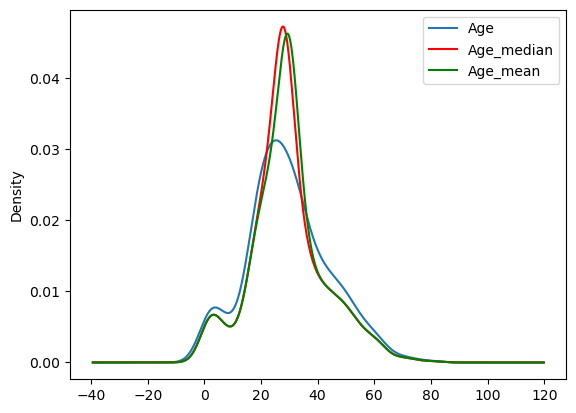

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# Variable imputed with median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# Variable imputed with mean
X_train["Age_mean"].plot(kind='kde', ax=ax, color='green')

# Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [54]:
X_train.cov()

,Age,Fare,Age_median,Age_mean
Age,210.251707,71.580633,210.251707,210.251707
Fare,71.580633,2700.831981,61.261919,56.981465
Age_median,210.251707,61.261919,169.207310,168.804449
Age_mean,210.251707,56.981465,168.804449,168.858278


In [56]:
X_train.corr()

,Age,Fare,Age_median,Age_mean
Age,1.000000,0.088103,1.000000,1.000000
Fare,0.088103,1.000000,0.090622,0.084377
Age_median,1.000000,0.090622,1.000000,0.998650
Age_mean,1.000000,0.084377,0.998650,1.000000


<Axes: >

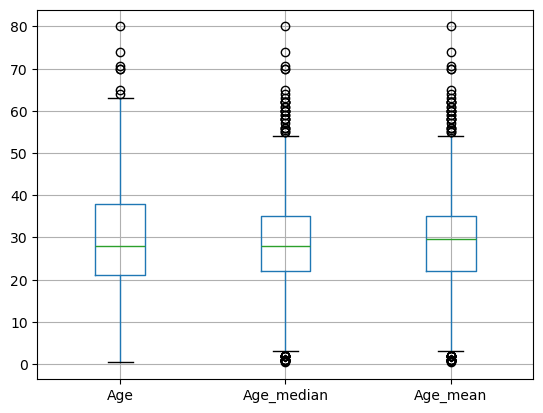

In [58]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

# Using Sklearn

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [63]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [65]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age'])
], remainder='passthrough')

In [67]:
trf.fit(X_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [71]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [ ]:
trf.named_transformers_['imputer2'].statis